HW1- Umamaheshwari Makkineni Ramnath

Importing the packages reqiured for the problem to be solved

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data

In [2]:
header = ["variance", "skew", "curtsies", "entropy", "classes"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df = pd.read_csv(url, names=header)

To return the first five rows of the data we use head function

In [3]:
df.head()

,variance,skew,curtsies,entropy,classes
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


info() is used to get the complete information about the data. Basically the summary of what the data contains.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skew      1372 non-null   float64
 2   curtsies  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   classes   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


To find the number of rows and columns in the data we use df.shape

In [5]:
df.shape

(1372, 5)

df.column is used to get the list of all column names

In [6]:
df.columns

Index(['variance', 'skew', 'curtsies', 'entropy', 'classes'], dtype='object')

To know the number of columns we use column size

In [7]:
df.columns.size

5

Addressing of the dataframe can be determined by using index

In [8]:
df.index

RangeIndex(start=0, stop=1372, step=1)

isnull is used to find if the null values are present in the data or not

In [9]:
df.isnull()

,variance,skew,curtsies,entropy,classes
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1367,False,False,False,False,False
1368,False,False,False,False,False
1369,False,False,False,False,False
1370,False,False,False,False,False


It provides the total number of null values

In [10]:
df.isnull().sum()

variance    0
skew        0
curtsies    0
entropy     0
classes     0
dtype: int64

In [ ]:
Plotted the graph based on the classes. There are two classes 0 and 1

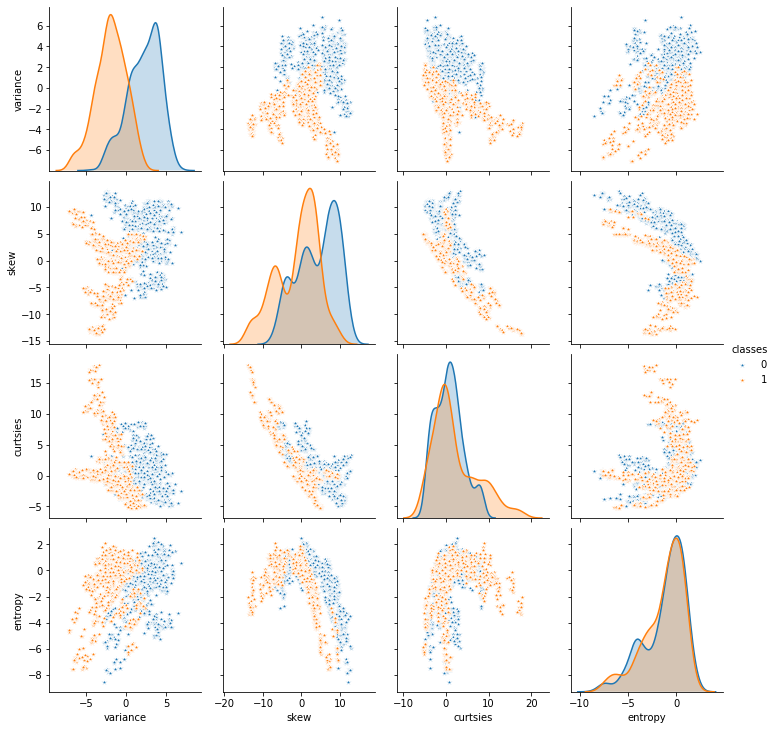

In [11]:
g = sns.pairplot(df, hue='classes', markers='*')
plt.show()

Histogram based on columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BAC7113C8>,
      dtype=object)

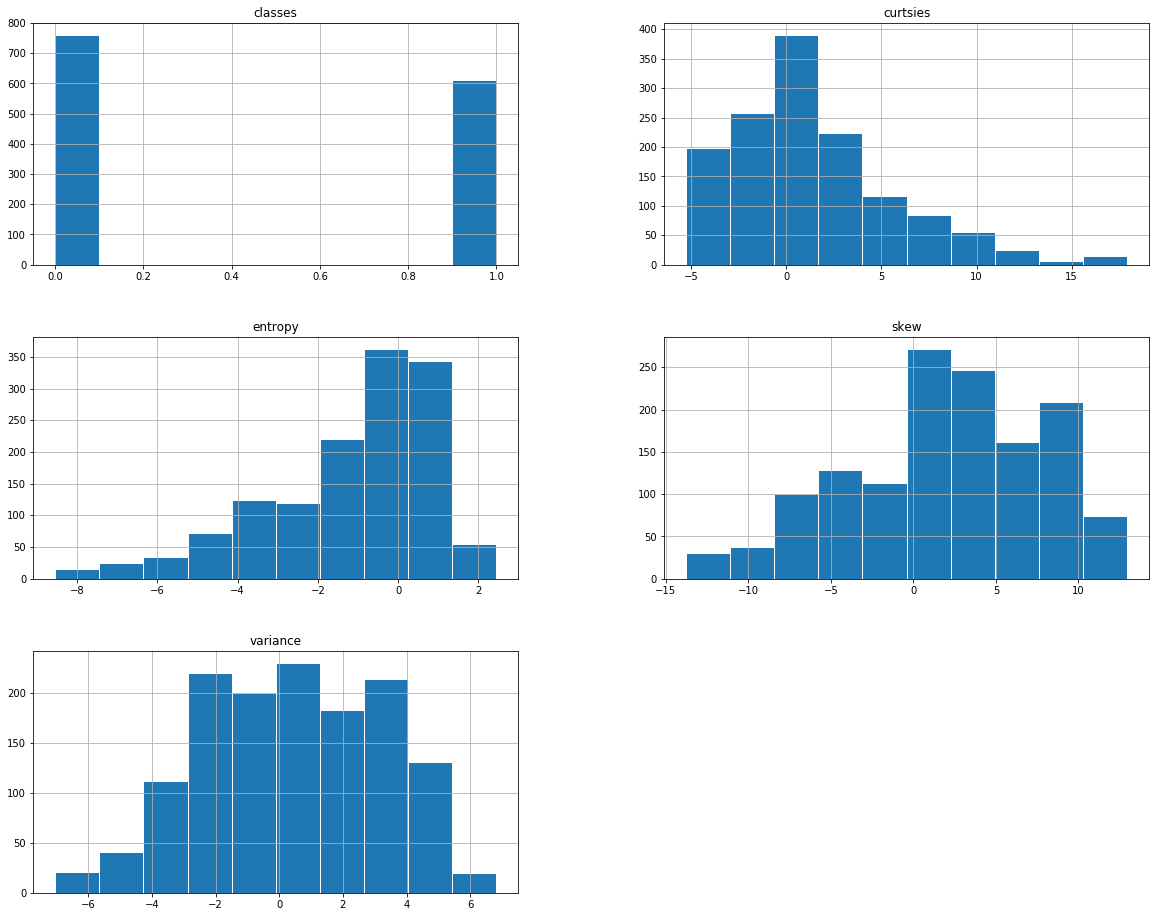

In [19]:
df.hist(edgecolor = 'white', figsize = (20,16))

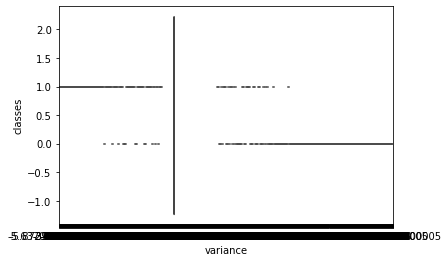

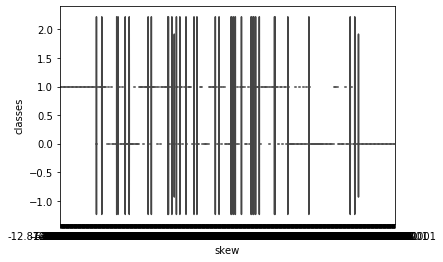

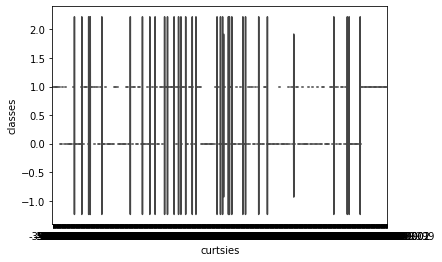

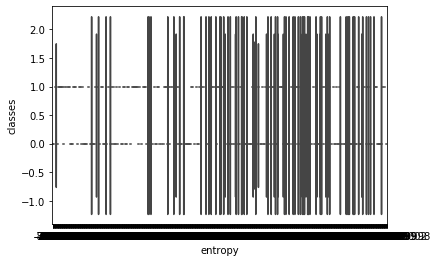

In [12]:
g = sns.violinplot(y='classes', x='variance', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='classes', x='skew', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='classes', x='curtsies', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='classes', x='entropy', data=df, inner='quartile')
plt.show()

Creating x and y coordinates for the model

In [25]:
X = df.drop(['classes'], axis=1)
y = df['classes']

Train and test set for the model is been created

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

In [15]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Calculating the y_pred 

In [16]:
y_pred = ppn.predict(X_test)

In [17]:
y_test

126     0
7       0
1082    1
188     0
719     0
       ..
1150    1
876     1
642     0
348     0
297     0
Name: classes, Length: 549, dtype: int64

Calculating the accuracy score

In [18]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9817850637522769

In [20]:
max_value = df["variance"].max()
max_value

6.8248

In [21]:
max_index = df["skew"].idxmax()
max_index

126

In [22]:
df['curtsies'][max_index]

3.3285

In [23]:
pd_p = pd.pivot_table(df, index=["classes"], values=["entropy", "skew"], aggfunc={"entropy":np.min, "skew":np.max}) 

In [24]:
pd_p

,entropy,skew
classes,,
0,-8.5482,12.9516
1,-7.5887,9.6014
